<!--TABLE OF CONTENTS-->
Contents:
- [Linear Regression](#Linear-Regression)
  - [Introduction](#Introduction)
  - [Normal Equation (optional clarification)](#Normal-Equation-(optional-clarification))
  - [Gradient Descent](#Gradient-Descent)
  - [Polynomial Regression](#Polynomial-Regression)
  - [Regularized Models](#Regularized-Models)
    - [Ridge Regression](#Ridge-Regression)
    - [Lasso Regression](#Lasso-Regression)
  - [Regression metrics](#Regression-metrics)
  - [Practice question](#Practice-question)
- [Data visualization](#Data-visualization)
  - [Matplotlib](#Matplotlib)
    - [MatplotLib Basics](#MatplotLib-Basics)
    - [Scatter plots](#Scatter-plots)
    - [Histograms](#Histograms)
    - [Stylesheets](#Stylesheets)
  - [Seaborn](#Seaborn)
    - [Histograms, KDE, densities](#Histograms,-KDE,-densities)
    - [Pair plots](#Pair-plots)
    - [Faceted histograms](#Faceted-histograms)
    - [Cat plots](#Cat-plots)
    - [Joint distributions](#Joint-distributions)
    - [Violin plots](#Violin-plots)

In [2]:
import pandas as pd
import numpy as np

# Linear Regression

## Introduction

Linear models make a prediction using a linear function of the input features. Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters  $\theta$  that minimize the cost function. The cost  function is the mean of the squared errors between predictions and the true regression targets of the training set. Let's apply linear regression to a simple problem.

First, we will use a toy data set. `Sklearn` has a module for generating datasets. We will use it to generate a simple dataset with only one feature, and a target. 

Note that in this notebook, we will be importing libraries as we mention them for clarity. But good practice is to import all the libraries at the beginning of a notebook.

In [7]:
from sklearn.datasets import make_regression

In [8]:
X, y = make_regression(n_samples=50, n_features=1,  noise=20, bias=10, random_state=1) 

With the above line of code we generated 50 samples, made of one feature and one target. With `noise` and `bias` parameters we specified the bias and the standard deviation of the gaussian noise applied to the output, meaning we introduced some noise in order not to have our generated dataset resemble a perfect line. With the parameter `random_state` fixed we just ensured that each time we ran the above line of code we would get the same output. We could have set any value, it did not have to be 1, however, if we did not specify the `random_state`, each time the noise generated would be different. In order to ensure that everybody has the same plots in this notebook, we fixed the `random_state`.

Using the function `type` and `shape` attribute we can see that X is a 2D numpy array, with 50 rows and 1 column:

In [11]:
type(X)

numpy.ndarray

In [12]:
X.shape

(50, 1)

And y is a 1D array with 50 values:

In [14]:
type(y), y.shape

(numpy.ndarray, (50,))

Now let's visualize the dataset. We will use `matplotlib` library which is the primary scientific plotting library in Python. It provides functions for making  line charts, histograms, scatter plots, and so on. Later on we will also use `seaborn`, just like we did in the first Notebook. `seaborn` is built on top of `matplotlib`, and provides additional functionalities and ease of use.
For more details on `matplotlib` check the link: \
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html. 

A more detailed explanation of `matplotlib` and `seaborn` libraries will be given in the next section of the notebook.

In [16]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'A simple dataset')

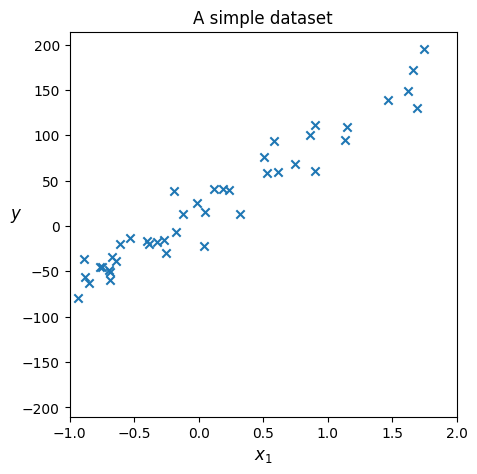

In [17]:
fig = plt.figure(figsize=(5,5))
plt.scatter(X, y, marker="x")
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$y$', rotation=0, fontsize=12)
plt.xlim(-1, 2)
plt.title('A simple dataset')

So, in the above cell we defined the size of the plot with `figsize`, we drew a scatter plot with `scatter`, defined x and y- label with `xlabel` and `ylabel`, defined that the x-axis should be between -1 and 2 with `xlim` and set the plot title with `title`.

Now let's use Linear Regression to find the line that fits our data the best. Recall that the *best* means that the values of the parameters minimize the mean of the squared errors for the training dataset, which in our case will be X, y.

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X, y)

Now, let's look at what we did with in the above cell.
Method `fit` for `sklearn` models, fits the training data, meaning it uses the training data to train the model, i.e., to estimate the model parameters from the training data. For supervised learning applications, it accepts two arguments: the data X and the labels y,  for unsupervised: accepts only a single argument, data X. 

Hence with stating `LinearRegression().fit(X, y)` we fitted a linear regression model to our data, meaning we used our 50 data points to find the values of $\theta$ such that the value of the cost function will be the smallest for these 50 points. The cost function is the mean of errors, between the true values, $y_i$, and the estimated values of  $\hat{y_i}=\theta_0+ \theta_1*x_{1i}$, where $i$ will be range from 1 to 50. 


The value of the estimated parameter $\theta_1$, also called weight or coefficient, is stored in the `coef_` attribute, while the intercept $\theta_0$  is stored in the `intercept_` attribute of the `LinearRegression` object. We have only coefficients $\theta_0$ and $\theta_1$ as we only have 1 feature in our dataset.  Let's see the values of $\theta$ found in training:

In [23]:
print('lr.coef_ is' , lr.coef_)
print('lr.intercept_ is ', lr.intercept_)

lr.coef_ is [86.01397082]
lr.intercept_ is  14.368884903267741


As you might notice, there is an underscore at the end of `coef_` and `intercept_`.  `scikit-learn` always stores anything that is derived from the training data in attributes that end with a trailing underscore. This is done is to separate these learnt parameters from the parameters that are set by the user.
The `intercept_` attribute is always a single float number, while the `coef_` attribute is a numpy array with one entry per input feature. As we only have a single input feature, `lr.coef_` only has a single entry.

Let's plot the model we obtained.
First for the values of the x that we have on the plot, let's calculate their predicted value as:

$\hat{y}= \theta_0 + \theta_1  x_1$

In [26]:
y_pred = lr.intercept_ + lr.coef_[0] * X

However, instead of doing this manually, we could simply use the `predict` function of sklearn's models, which now takes only X as input:

In [28]:
y_pred=lr.predict(X)

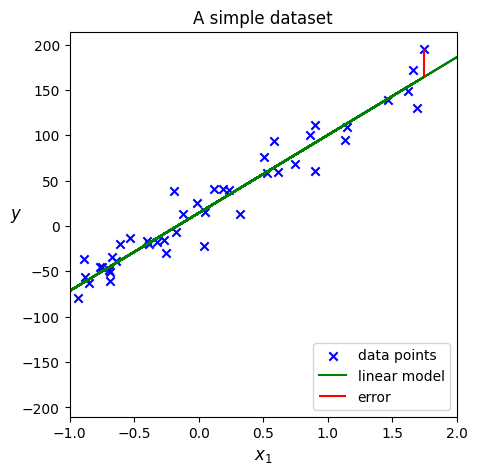

In [29]:
fig = plt.figure(figsize=(5,5))
plt.scatter(X, y, marker="x", color='blue', label='data points')
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$y$', rotation=0, fontsize=12)
plt.plot(X, y_pred, label='linear model',  color='green')

plt.vlines(X[9], y[9], y_pred[9],  color='red', label='error')
plt.xlim(-1, 2)
plt.title('A simple dataset')
plt.legend(loc="lower right", fontsize=10)

Above, in color blue, we plotted the true values of *y* (our data points). In green, we plotted the predicted values, *y_pred* (linear model). And in red we showed the error for one data point, point with index $9$, where in red we see the distance between the true value y[9] and the predicted value, y_pred[9].

While we have manually constructed the above plot, we could have also used sklearn's PredictionErrorDisplay visualization. This tool can display “actual vs predicted” and “residuals vs predicted” error using scatter plots to visualize the prediction error of a regression model.

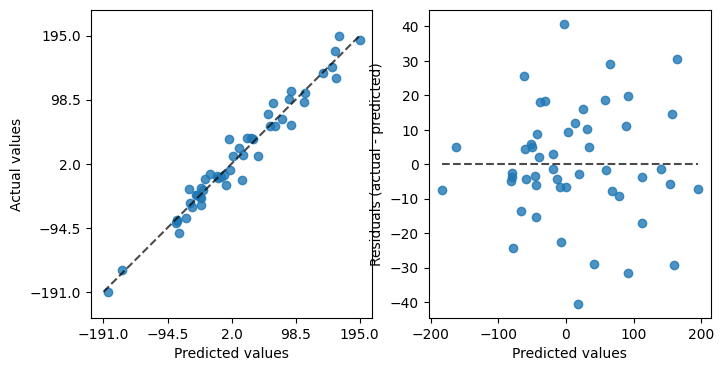

In [32]:
from sklearn.metrics import PredictionErrorDisplay
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
PredictionErrorDisplay.from_estimator(lr, X, y, ax=axes[0], kind="actual_vs_predicted")
PredictionErrorDisplay.from_estimator(lr, X, y, ax=axes[1], kind="residual_vs_predicted")
plt.show()

By default, the `scikit-learn` library calculates the optimal parameters of linear regression models using the closed form solution, which we will see below, but the Gradient Descent, which scales better for large datasets, would also work.

## Normal Equation (optional clarification)

- **Ordinary Least Squares (OLS)**: Method that finds the values of the parameters (coefficients) that minimize the mean of squared differences between the observed and predicted values (i.e., the mean of squared residuals or the cost function).
- **Normal Equation**: Direct formula to compute the coefficients.

To optimal value of parameters (coefficients) $\theta$ are those that minimize the cost function: mean of squared differences between the observed and predicted values. Mathematically, for the case of our dataset with a single feature, this is expressed as minimizing the following objective function:


\begin{equation}
\frac{1}{m}\sum_{i=1}^{m} (y_i - (\theta_0 + \theta_1 x_i))^2 = \frac{1}{m}\sum_{i=1}^{m} (y_i - \hat{y_i})^2
\end{equation}

In vector form, $y$ (observed) and $\hat{y}$ (predicted) can be represented as follows:


\begin{array}{cc}
y=\begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_m \end{bmatrix} &
X\theta = \hat{y} = \begin{bmatrix} \hat{y_0} \\ \hat{y_1} \\ \vdots \\ \hat{y_m} \end{bmatrix}
\end{array}

$X\theta$ represents the predicted values of the dependent variable based on the linear regression model. It's a matrix multiplication where $X$ contains the data points (in rows), each one represented with n features, and $\theta$ contains the model parameters/coefficients.

How can the objective function be expressed with vectors? The observed and predicted values must be subtracted first:

\begin{equation}
y - X\theta
\end{equation}

Note that the square of a vector/matrix is not equal to the square of each of its values, but a matrix is multiplied by its transpose. The final equation derived, which is equivalent to the original objective function, is as follows:

\begin{equation}
(y - X\theta)^T\cdot(y - X\theta)
\end{equation}

After computing the partial derivative of this cost function with respect to $\theta$ and equating it to 0 to find the value of $\theta$ that minimizes it, the *closed-form solution* —i.e., a mathematical equation that gives the result directly without the need for an iterative optimization process— is finally obtained. This is called the *Normal Equation*:

\begin{equation}
\hat{\theta} = (X^T\cdot X)^{-1}\cdot X^T\cdot y
\end{equation}


Recall that the linear regression with the case of n features predicts the value as $\hat{y}= \theta_0 + \theta_1  x_1 +\ldots +\theta_n  x_n$. \
The value of the intercept $\theta_0$ multiplies the constant 1, not some feature (x). So, in the matrix equation above, the first column of the matrix X is the value 1 which multiplies the intercept.

First we will import `numpy`, which is one of the fundamental packages for scientific computing in Python. It contains functionality for multidimensional arrays, high-level mathematical functions such as linear algebra operations.

We will use the `inv()` function from NumPy’s Linear Algebra module (`np.linalg`) to compute the inverse of a matrix, and the `dot()` method for matrix multiplication:

Now before we calculate using normal equation, we need to add the column of ones to our X, as explained above (as column of 1s multiplies the intercept). We will do this with numpy's function `c_` which concatenates, in our case, a column of all 1s with our X. Note that we did not have to do this for Linear Regression, this will be done by default.

In [46]:
X_b = np.c_[np.ones((50, 1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([14.3688849 , 86.01397082])

How do values these values of $\theta$ compare with the ones obtained using `sklearn`? 

## Gradient Descent

Gradient Descent is an optimization algorithm capable of finding values that minimize a function. The general idea of Gradient Descent is to update parameters iteratively in order to minimize a cost function.

\begin{equation}
\theta^{(new)} = \theta^{(old)} - \alpha\nabla_\theta\mbox{J}(\theta)
\end{equation}

Let us breakdown the formula above. For each iteration:

- $\theta^{(new)}\$: updated estimate of parameters/coefficients

- $\theta^{(old)}\$: current estimate of parameters/coefficients

- $\alpha\$: this is the learning rate that determines the size of the step taken during each iteration of the optimization process. A smaller learning rate makes the algorithm more stable but might require more iterations, while a larger learning rate can speed up convergence but might cause overshooting.

- $\nabla_\theta\mbox{J}(\theta)$: the gradient/derivative of the cost function with respect to the parameters 𝜃

<br>

The cost function that is being minimized is the Mean Squared Error (MSE). 

For a selected learning rate, this begins by randomly initializing the values for the coefficients/parameters, and computing the gradient/derivative (slope at that point) for those coefficients/parameters. 

Subsequently, the learning rate is multiplied by the gradient and this is called the step size. After subtracting the current coefficients by the step size, the new coefficients are obtained.  

And this is repeated until convergence or the maximum number of iterations set is reached (finding global minimum is not guaranteed in non-convex cases).

<br>

Below is an implementation of gradient descent. We want to keep track of the cost function and the coefficients throughout the iterations, hence we will store these values in each iteration in a list (one list for the value of the cost function, one list for the value of $\theta_0$ and for the values of $\theta_1$). We will fix the number of iterations to 1000, and start by using randomly initialized values of $\theta_0$ and $\theta_1$.

If we only had a simple case of a cost function $(y-\theta x)^2$, with a single data point (and ignoring just for illustration $\theta_0$) then the derivative of this function with respect to $\theta$ would be $-2x(y-\theta x)$. Now, the gradient formula used below is just a more complex version of this formula (when we have $m$ data points, meaning $y$ is a vector, and we have both $\theta_0$ and  $\theta_1$ ), no need to go into details or memorize it. We will use it below just to visualize how the gradient descent algorithm works.

In [54]:
theta = np.random.randn(2,1) # random initialization

In [55]:
cost_lst=[]
theta_0=[]
theta_1=[]
# alpha is our learning rate
alpha = 0.1
n_iterations = 1000
# m is the number of instances, we will determine this from the number of rows of our X_b (X with an added column of all 1s)
m = X_b.shape[0]
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = -2/m * X_b.T.dot(np.vstack(y) -X_b.dot(theta)) 
    theta = theta - alpha * gradients
    cost=1/m*((np.vstack(y)-X_b.dot(theta))**2).sum()
    cost_lst.append(cost)
    theta_0.append(theta[0])

How do values these values of $\theta$ compare with the one obtained using normal equation? 

In [57]:
print(theta)

[[14.3688849 ]
 [86.01397082]]


Let's visualize what is happening with the value of the cost function with each new iteration of the gradient descent. In each iteration, we have a possibly different value of the parameter.

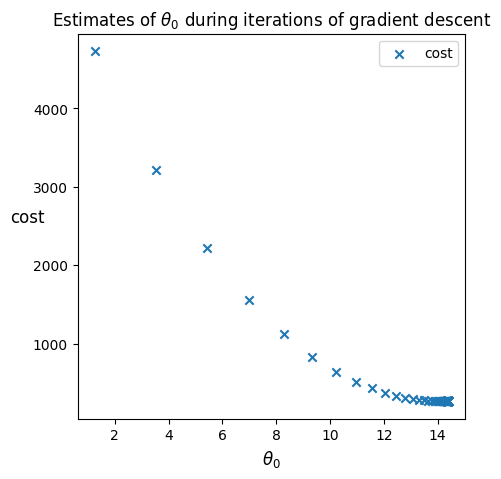

In [59]:
fig = plt.figure(figsize=(5,5))
plt.scatter(theta_0, cost_lst, marker="x", label='cost')
# To write correctly the math expression $theta_0)$, we use the prefix r
plt.xlabel(r'$\theta_0$', fontsize=12)
plt.ylabel('cost', rotation=0, fontsize=12)
plt.title(r'Estimates of $\theta_0$ during iterations of gradient descent')
plt.legend(loc="upper right", fontsize=10);

- Now, adapt the code to visualize what happens to $\theta_1$.
- Try rerunning the algorithm, as each time the initial value of $\theta$ will be different.
- Try changing the number of iterations.

Recall the discussion on the shape of the cost function, convex vs non-convex.
Is it always guaranteed that the gradient descent will arrive at the solution given a sufficient number of iterations?

Notice that here we set the value of the learning rate to 0.1. Would the results be different if we had chosen some different value? 

Let's test. 

First we will put all the code above into one function, with the learning rate as a parameter. Also, we will not only plot the values of $\theta$, but we will also show the line connecting the estimate from one iteration with the estimate of the next iteration, to see the changes from one iteration to another.

In [63]:
def plot_cost(alpha, X_b, y):
    cost_lst=[]
    theta_0=[]
    theta_1=[]
    n_iterations = 1000
    m, n = X_b.shape 
    theta = np.random.randn(n,1) # random initialization
    for iteration in range(n_iterations):
        gradients = -2/m * X_b.T.dot(np.vstack(y) -X_b.dot(theta)  ) 
        theta = theta - alpha * gradients
        cost=1/m*((np.vstack(y)-X_b.dot(theta))**2).sum()
        cost_lst.append(cost)
        theta_0.append(theta[0])
    fig = plt.figure(figsize=(5,5))
    plt.plot(theta_0, cost_lst, marker="x", label='cost')
    plt.xlabel(r'$\theta_0$', fontsize=12)
    plt.ylabel('cost', rotation=0, fontsize=12)
    # To write correctly the math expression $theta_0)$, we use the prefix r, 
    # To write the value of variable alpha, we write it inside the the curly braces and use the prefix f
    plt.title(fr'The value of the cost function vs the values of $\theta_0$ during iterations of gradient descent for learning rate = {alpha}')
    plt.legend(loc="upper right", fontsize=10)


Not let's visualize the plot with $\alpha$ = 0.1

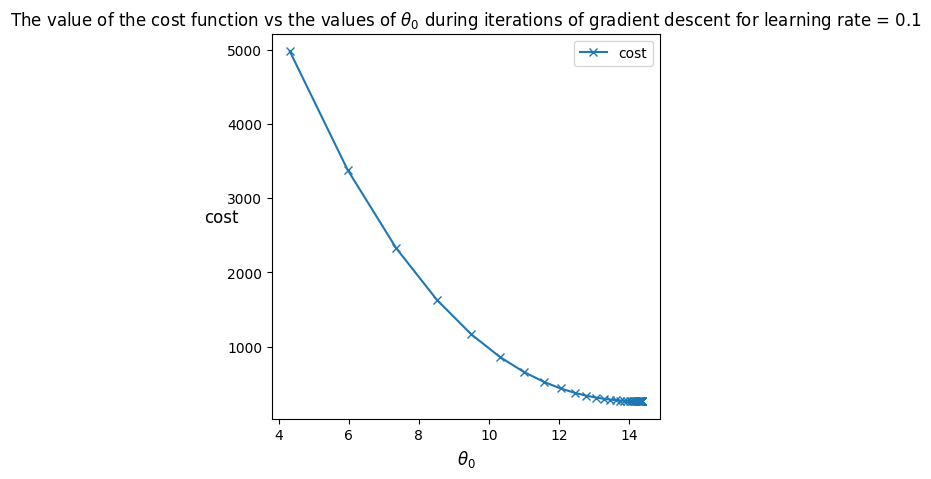

In [65]:
plot_cost(0.1, X_b, y)

How about a lower value, like $\alpha$ = 0.01?

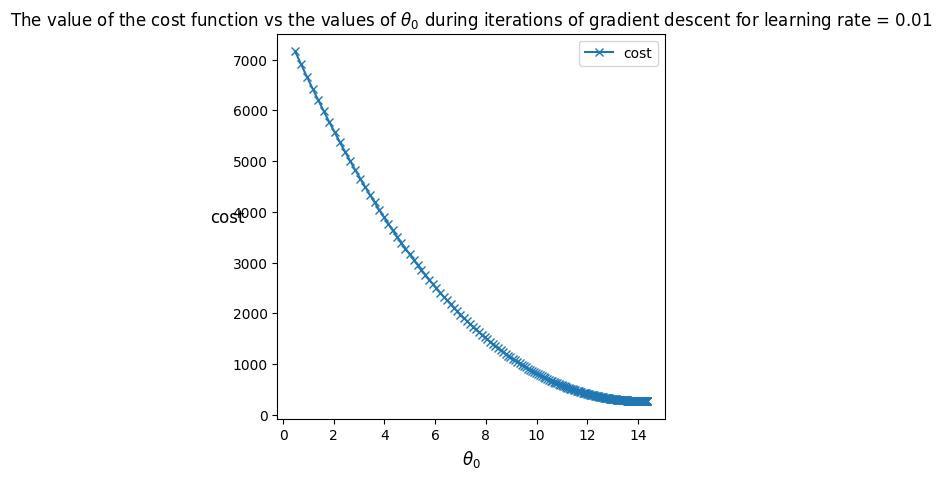

In [67]:
plot_cost(0.01, X_b, y)

How about a higher value like $\alpha$=1?

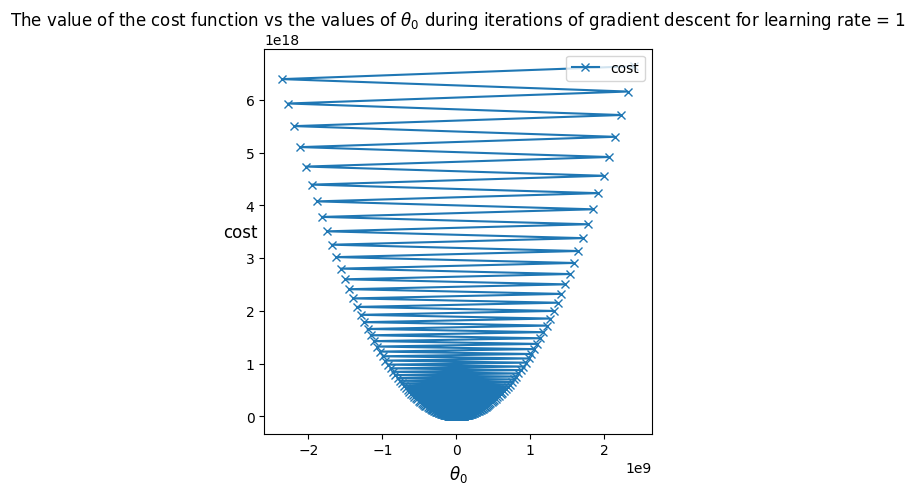

In [69]:
plot_cost(1, X_b, y)

How long did it require to get to the optimal solution in each case?

Now, how let's discuss the choice for the number of iterations.

How did we know in advance that the algorithm would arrive at the solution for that number of iterations? If we had chosen a much lower number, we could still be far away from the optimal solution when the algorithm stops, but if we set the value too high, we might waste time while the model parameters do not change anymore. A simple solution is to set a very large number of iterations, but to interrupt the algorithm when the gradient vector becomes tiny, that is, when its norm becomes smaller than a tiny
number $\epsilon$ (called the tolerance), because this happens when Gradient Descent has (almost) reached the minimum.


Here is another illustration of gradient descent from "Machine Learning Refined: Notes, Exercises, and Jupyter notebooks", by Jeremy Watt, Reza Borhani, Aggelos K. Katsaggelos. The link to this and many other interesting exercises: \
https://github.com/jermwatt/machine_learning_refined


![gradientUrl](https://raw.githubusercontent.com/neonwatty/machine-learning-refined-readme-gifs/main/gifs/normalized_gradient_descent.gif)

Important note:

In this simple case we only had one feature. When we start adding more features, it is important that they are of the *same scale*, for example, we could have one variable like annual salary on the scale of thousands, and a variable like a fraction, on the scale of 0 to 1. If we directly apply gradient descent on such a dataset, this could lead to problems in the convergence to the global minima,

Illustrated in: https://github.com/neonwatty/machine-learning-refined/blob/main/notes/3_First_order_methods/3_6_Problems.ipynb

One of the advantages of linear regression is its interpretability. We can compare the impact of each feature by comparing its coefficients. Having features of different scales makes it impossible to compare their importance using coefficient. This is another reason for scaling the features.

We will see more examples of this later on.

Now, why did we bother going into details of gradient descent, when we have a closed form solution that directly provides the coefficients that minimize the cost function, and even better, `sklearn` does the whole job of estimating the model parameters for us, with one line of code?

Well, in the case of linear regression, our cost function is convex (guaranteed convergence to global minimum), but we are not so lucky with neural networks. When training a neural network (non-convex cost functions, and thus the global minimum may not be achieved), we will use a version of gradient descent and for that, we will need to understand the basics of the algorithm, how to choose the number of iterations and the value of the learning rate. And these concepts are easier to analyze for the simpler case of linear regression.

## Polynomial Regression

What if our data is actually more complex than a simple straight line? 

Surprisingly, we can actually use a linear model to fit nonlinear data. A simple way to do this is to add functions of each feature as new features, then train a linear model on this extended set of features. If the function that we are using is polynomial, then this technique is called Polynomial Regression.

Let's set the value of `numpy` random seed to a fixed value, to guarantee the same values for each execution.

In [79]:
import numpy.random as rnd

np.random.seed(42)

Let’s look at an example. First, let’s generate some nonlinear data, based on a simple
quadratic equation:

$y=2+x+0.5x^2+\epsilon$.

Now we know the ground truth, i.e., that the true value of our parameters is: $\theta_0=2$,  $\theta_1=1$ and  $\theta_2=0.5$.

In [81]:
m = 50
# Let's some values of X, and sort them
X = 6 * np.random.rand(m, 1) - 3
X.sort(axis=0)
# Let's now calculate y, by adding some noise to the true values
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Check the shape of our data.

In [83]:
X.shape

(50, 1)

In [84]:
y.shape

(50, 1)

Let's plot and see our data.

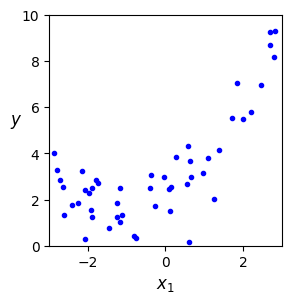

In [86]:
fig = plt.figure(figsize=(3,3))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.axis([-3, 3, 0, 10])
plt.show()

Clearly, a straight line will never fit this data properly. So let's use `scikit-Learn`'s `PolynomialFeatures` class to transform our training data, adding the square (2nd-degree polynomial) of our single feature in the training set as a new feature.

In [88]:
#Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. 
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)


What did we just do?
`sklearn` objects can be `models` and `transformers`. `LinearRegression` is a `model` and `PolynomialFeatures` is a transformer. As the name suggests, models are used to make prediction and transformers are for preprocessing before modeling.  `Transformers` have the following methods:
- `fit` method, which learns model parameters from the training set,
- `transform` method which applies this transformation model to unseen data.
- `fit_transform` may be more convenient and efficient for modeling and transforming the training data simultaneously.

Check the dimension of our original data, and the one after adding the quadratic term. Note that we specified that we did not need `PolynomialFeatures`to add us a column of all 1s (with `include_bias=False`), as Linear Regression will do that.

In [91]:
print(X.shape)
print(X_poly.shape)

(50, 1)
(50, 2)


X_poly now contains the original feature of X plus the square of this feature. Let's confirm this by looking at the first element, calculate its square and compare to the second element of our new extended dataset X_poly.

In [93]:
X[0], X[0]**2, X_poly[0]

(array([-2.87649303]), array([8.27421218]), array([-2.87649303,  8.27421218]))

Note that here we only had a single feature, so with this transformer we only added one additional feature, its square. In case of two input features, the degree-2 polynomial features are [$1$, $x_1$, $x_2$, ${x_1}^2$, $x_1 x_2$, ${x_2}^2$], meaning we would also have interaction features $x_1 x_2$.

Now we can fit a LinearRegression model to this extended training data:

In [96]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

Let's check the values of estimated parameters and compare them to the true ones: $y=2+x+0.5x^2+\epsilon$

In [98]:
lin_reg.intercept_, lin_reg.coef_

(array([2.05993771]), array([[1.02636703, 0.48218467]]))

Let's visualize how does this model capture our data. 
For each of the values of the x that we have on the plot, let's calculate their predicted value as:

$\hat{y}= \theta_0 + \theta_1  x_1 + \theta_2  x_2$

In [100]:
y_pred_1=lin_reg.intercept_ + X_poly.dot(lin_reg.coef_.T)  

Or we could simply use the `predict` method of the model:

In [102]:
y_pred=lin_reg.predict(X_poly)

Method `predict`, as the name suggests predicts the label of a new set of data. This method accepts one argument, the data for which to make prediction and returns the learned label for each object in the array. 

Let's confirm that these two lines have the same output (calculating on our own and using `predict`). Let's count the number of equal points (total number of points is 50)

In [105]:
(y_pred_1==y_pred).sum()

50

Let's visualize our model.

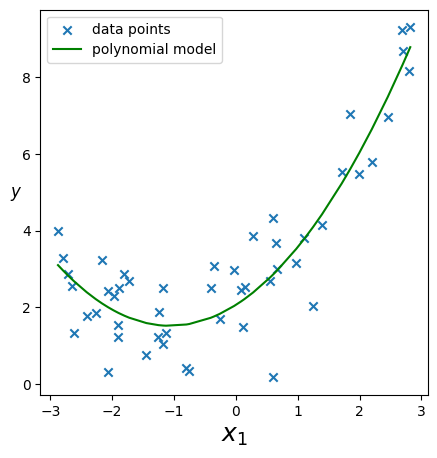

In [107]:
fig = plt.figure(figsize=(5,5))
plt.scatter(X, y, marker="x", label='data points')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=12)
plt.plot(X, y_pred, label='polynomial model',  color='green')
plt.legend(loc="upper left", fontsize=10);

What if we increase the number of degrees of a polynomial model?

Let's put all the relevant code in a function with the degree of a polynomial as an argument.

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
def plot_polynomial(deg, X,y):
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    X_scaled=StandardScaler().fit_transform(X_poly)
    lin_reg = LinearRegression()
    lin_reg.fit(X_scaled, y)
    y_pred = lin_reg.predict(X_scaled)
    
    fig = plt.figure(figsize=(5,5))
    plt.scatter(X, y, marker="x", label='data points')
    plt.xlabel('$x_1$', fontsize=12)
    plt.ylabel('$y$', rotation=0, fontsize=12)
    plt.plot(X, y_pred, label=f'Polynomial model of degree {deg}',  color='green')
    plt.legend(loc="upper left", fontsize=8)

As you might have noticed, we have sneaked an additional step in the above function: *scaling*.
Recall from the discussion above the importance of features being on the same scale, now think about the range of values that one variable can take and that same variable to the power of 2, or 5, or 100!
Dealing with different scales makes the problem much more difficult, hence before training the model, we scale the data. In this case we are using `StandardScaler` which sets the mean to zero, and variance to one. We will explore the different ways of scaling later on, but for now we will apply this scaler to transform our data.

Also notice how in each stage, we transform the data and feed it into the subsequent stage. Later on we will introduce a more efficient way of doing this: `pipelines`, but for now we just leave it as it is.

Now, what if we use only a simple linear model, no ploynomial features. Let's use the above function to visualize this.

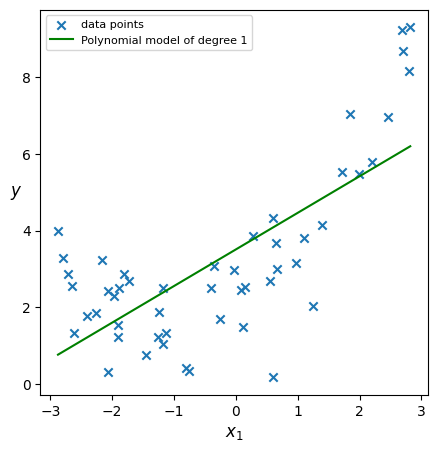

In [114]:
plot_polynomial(1, X,y)

How about if we use a degree 100?

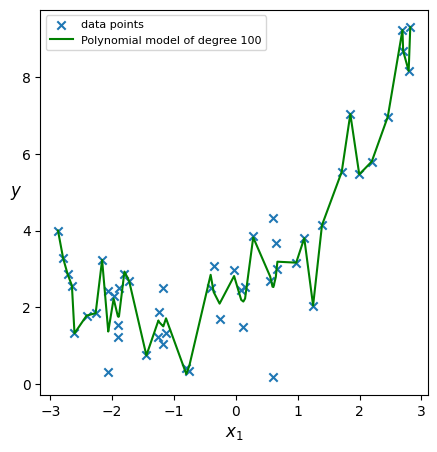

In [116]:
plot_polynomial(100, X,y)

Analyze the above plots, and the original plot, degrees 1, 2 and 100.
- Which model would have lower error with training data, data that was used to train the model?
- Which model is too simple?
- Which model generalizes better? Which model would make smaller error when predicting for a new, unseen data point?
- Which model is underfitting, which is overfitting?

Now, let's generate some more datapoints with the same formula. These datapoints are therefore coming from the same distribution as our original dataset. This time, we will just change the seed for generating numbers, in order not to get the same values as in the original dataset.

In [119]:
np.random.seed(0)
m = 50
X_test = 6 * np.random.rand(m, 1) - 3
X_test.sort(axis=0)
y_test = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [120]:
X.shape, X_test.shape

((50, 1), (50, 1))

Next, let's run a loop, and for each value of a degree, we will train the model on the training data, and then use the same model to predict the training points target, and to predict the target of the new datapoints. These new data points are our *test set*, data not used in the training, yet data for which we actually know the true outcome (y_test).

Both for training and test set, we will calculate the difference between the predicted value of y and the true value of y. 

In [122]:
max_degree=20
error_test_lst=[]
error_train_lst=[]

for deg in range(1,max_degree):
    
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    scaler=StandardScaler()
    lin_reg = LinearRegression()
    
    X_poly = poly_features.fit_transform(X)
    X_scaled=scaler.fit_transform(X_poly)
    lin_reg.fit(X_scaled, y)
    y_pred_train=lin_reg.predict(X_scaled) 
    error_train=1/len(y)*((y-y_pred_train)**2).sum()
    error_train_lst.append(error_train)
    
    X_poly_test = poly_features.transform(X_test)
    X_scaled_test=scaler.transform(X_poly_test)
    y_pred_test=lin_reg.predict(X_scaled_test)
    error_test=1/len(y_test)*((y_test-y_pred_test)**2).sum()
    error_test_lst.append(error_test)

Before we visualize the results, we need to notice something **very important** in a machine learning pipeline.
The model is trained on the training data, and the training data only. This data is used to find the parameters of the scaler, and the model, using the method `fit`. **No fitting is done on the test set**, only `transform` of the data using the known model parameters, models learned in the training stage. This way, there is **no data leakage** and we can get **independent evaluation of the model**. Again, once we start using `pipelines` the code will be much cleaner, and less repetitive.

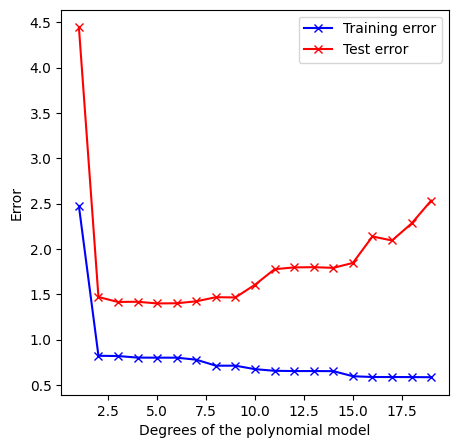

In [124]:
fig = plt.figure(figsize=(5,5))
plt.plot(range(1,max_degree), error_train_lst, marker="x", label='Training error', color='blue')
plt.plot(range(1,max_degree), error_test_lst, marker="x", label='Test error', color='red')
plt.xlabel('Degrees of the polynomial model')
plt.ylabel('Error')
plt.legend(loc="upper right", fontsize=10);

What can we conclude from the plot above? What is happening with the training error and what is happening with the test error? 

This brings us to discussion of regularized models.

## Regularized Models

One way to reduce overfitting is to regularize the model: the fewer degrees of freedom, i.e., coefficients it has, the harder it will be for it to overfit the data. For example, a simple way to regularize a polynomial model is to reduce the number of polynomial degrees.
For a linear model, regularization is typically achieved by constraining the weights of the model. There are different ways of doing this, the popular ones are: Ridge Regression and Lasso Regression.

### Ridge Regression

Ridge Regression  is a regularized version of Linear Regression, it adds a factor of sum of squares of coefficients in the optimization objective. Thus, Ridge regression minimizes the following: \
Cost function = MSE($\theta$) + $\alpha$ * (sum of square of coefficients) \
Here, $\alpha$  is the parameter which balances the amount of emphasis given to minimizing the original cost function vs minimizing sum of square of coefficients. Note only coefficients $\theta_1$ onwards are minimized, not the intercept term.

The additional penalty term forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, we need to evaluate the model’s performance using the unregularized performance measure. Ridge regression is implemented in `linear_model.Ridge`.

We will illustrate the effect of the penalty term on the cost function using a simple dataset.

In [132]:
np.random.seed(1)  #Setting seed for reproducibility

# Define input array with angles from 60 deg to 300 deg converted to radians
X = np.array([i*np.pi/180 for i in range(60,300,4)])
# Generate y by adding normal noise with mean 0, and standard deviation 0.35 to the sine of X
y = np.sin(X) + np.random.normal(0,0.35,len(X))
X = np.vstack(X)

Check the shape of our X and y.

In [134]:
print(X.shape)
print(y.shape)

(60, 1)
(60,)


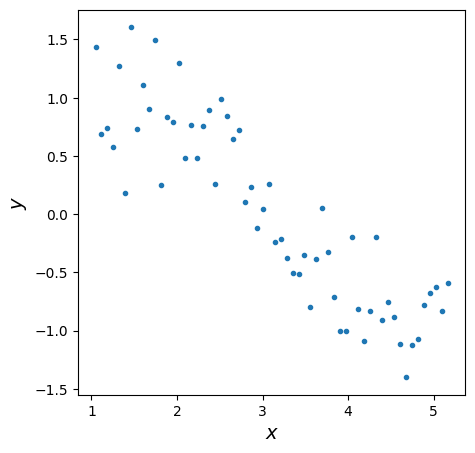

In [135]:
fig = plt.figure(figsize=(5,5))
plt.plot(X,y,'.')
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14);

In [136]:
from sklearn.linear_model import Ridge

We adapt the code used above, to add polynomial functions of the input feature, scale the features, and train the model, but this time we use Ridge regression.

In [138]:
from IPython.display import display

In [139]:
def plot_ridge(X,y, alpha_value):

    poly_features = PolynomialFeatures(degree=20, include_bias=False)
    scaler = StandardScaler()
    ridge = Ridge(alpha=alpha_value)
    
    X_poly = poly_features.fit_transform(X)
    X_scaled=scaler.fit_transform(X_poly)
    ridge.fit(X_scaled, y)
    y_pred = ridge.predict(X_scaled)
    error = 1/len(y_pred)*((y-y_pred)**2).sum()
    
    fig = plt.figure(figsize=(5,5))
    plt.plot(X,y,'.', label='true values')
    plt.plot(X,y_pred, label='model', color='green')
    plt.xlabel("$x$", fontsize=14)
    plt.ylabel("$y$", fontsize=14)
    plt.legend(loc="lower left", fontsize=10)
    print('Training error is' , error)
    print('Intercept estimate is ', ridge.intercept_)
    display('Estimate of the coefficients:', (ridge.coef_) )
    return ridge.coef_

Let's now run the code with, putting the importance of the penalty function very low,  meaning we set the penalty importance parameter $\alpha$ to a low value.

Training error is 0.09283886367791123
Intercept estimate is  0.017343773951509246


'Estimate of the coefficients:'

array([-1.34875561e+01,  6.39004555e+01, -1.06706371e+02,  5.22281648e+01,
        3.56543704e+01, -3.57720296e+01, -3.49326597e+01,  1.40165149e+01,
        4.70064094e+01,  3.76300506e+01,  8.09031317e-02, -3.69557474e+01,
       -5.20439108e+01, -3.93954511e+01, -7.21005021e+00,  2.84518558e+01,
        5.03247476e+01,  4.52980532e+01,  8.05662836e+00, -5.67716229e+01])

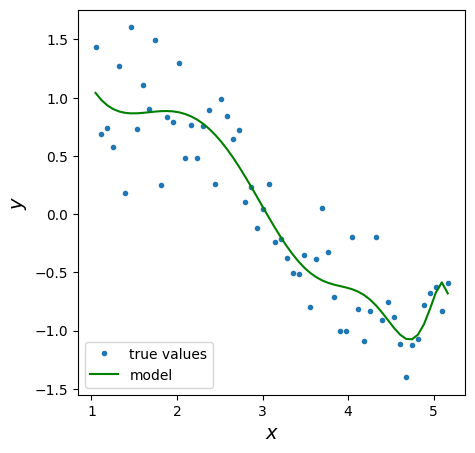

In [141]:
alpha_s = 1e-7
ridge_small = plot_ridge(X,y, alpha_s)

Now putting more importance on the penalty function.

Training error is 0.09313561259254435
Intercept estimate is  0.017343773951485


'Estimate of the coefficients:'

array([ -7.20830426,  25.03050968, -14.91467485, -21.6550451 ,
        -4.84816293,  12.89261424,  19.99447386,  15.50174527,
         4.09466771,  -8.20958706, -16.64218054, -18.73130422,
       -14.32930638,  -5.12146098,   6.02500115,  15.66926233,
        20.27705694,  16.55656246,   1.66740829, -26.66875277])

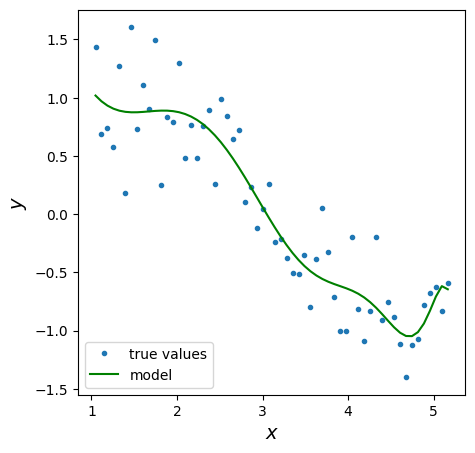

In [143]:
alpha_m = 1e-5
ridge_medium = plot_ridge(X,y, alpha_m)

And now with a high value.

Training error is 0.11603514268375476
Intercept estimate is  0.017343773951479746


'Estimate of the coefficients:'

array([-2.60775041e-01, -2.24066605e-01, -1.73140374e-01, -1.22413509e-01,
       -7.89036533e-02, -4.45122604e-02, -1.86699936e-02,  6.00333767e-05,
        1.32211242e-02,  2.21674702e-02,  2.79871603e-02,  3.15148702e-02,
        3.33740715e-02,  3.40231610e-02,  3.37960270e-02,  3.29346167e-02,
        3.16138658e-02,  2.99602648e-02,  2.80654578e-02,  2.59960988e-02])

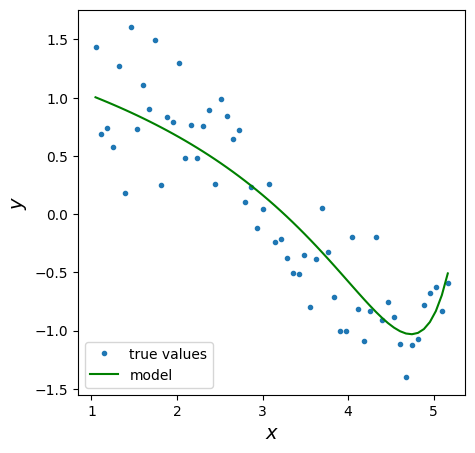

In [145]:
alpha_h = 10
ridge_high = plot_ridge(X,y, alpha_h)

What is happening with the parameters as we keep increasing the value of $\alpha$? We can visualize this.

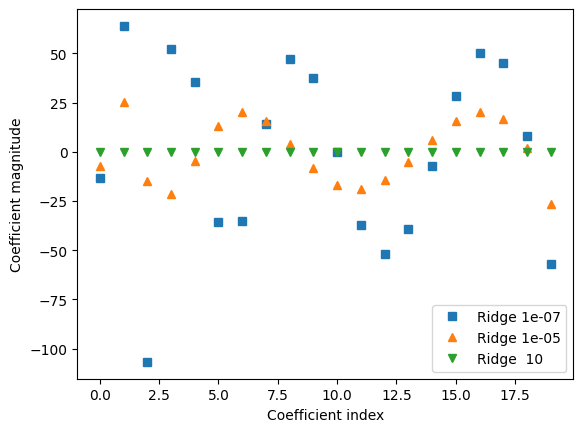

In [147]:
plt.plot(ridge_small, 's', label=f"Ridge {alpha_s}")
plt.plot(ridge_medium, '^', label=f"Ridge {alpha_m}")
plt.plot(ridge_high, 'v', label=f"Ridge  {alpha_h}")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend();

Here, the x-axis enumerates the entries of `coef_`: x=0 shows the coefficient associated with the first feature, x=1 the coefficient associated with the second feature, and so on up to x=20. The y-axis shows the numeric values of the corresponding values of the coefficients. The main takeaway here is that for very small values of $\alpha$ (blue squares), the coefficients are very large. The coefficients for the Ridge model with a slightly higher $\alpha$ are somewhat smaller (orange triangles). The green dots corresponding to the highest $\alpha$ have the lowest magnitude (green upside down triangles). Let's zoom in this case.

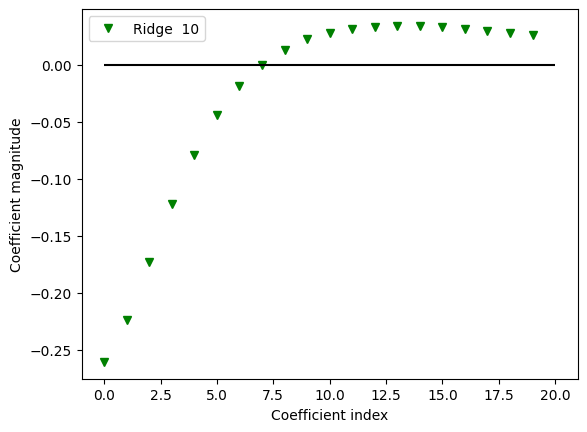

In [149]:
plt.plot(ridge_high, 'v', label=f"Ridge  {alpha_h}", color='green')
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(ridge_high), color='black')
plt.legend();

Are the coefficients equal to 0?

### Lasso Regression

Lasso Regression is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the L1 norm of the weight vector instead of the square of the L2 norm. Lasso regression is implemented in `linear_model.Lasso`.
It adds a factor of sum of absolute values of coefficients in the optimization objective. Lasso regression minimizes the following: \
Cost function = MSE($\theta$) + $\alpha$ * (sum of absolute values of coefficients)

Side note: Here is a gemoetric interpretation of these two regularization methods, taken from Machine Learning with PyTorch and Scikit-Learn, by Sebastian Raschka, Yuxi (Hayden) Liu, Vahid Mirjalili. 

<table><tr>
<td> 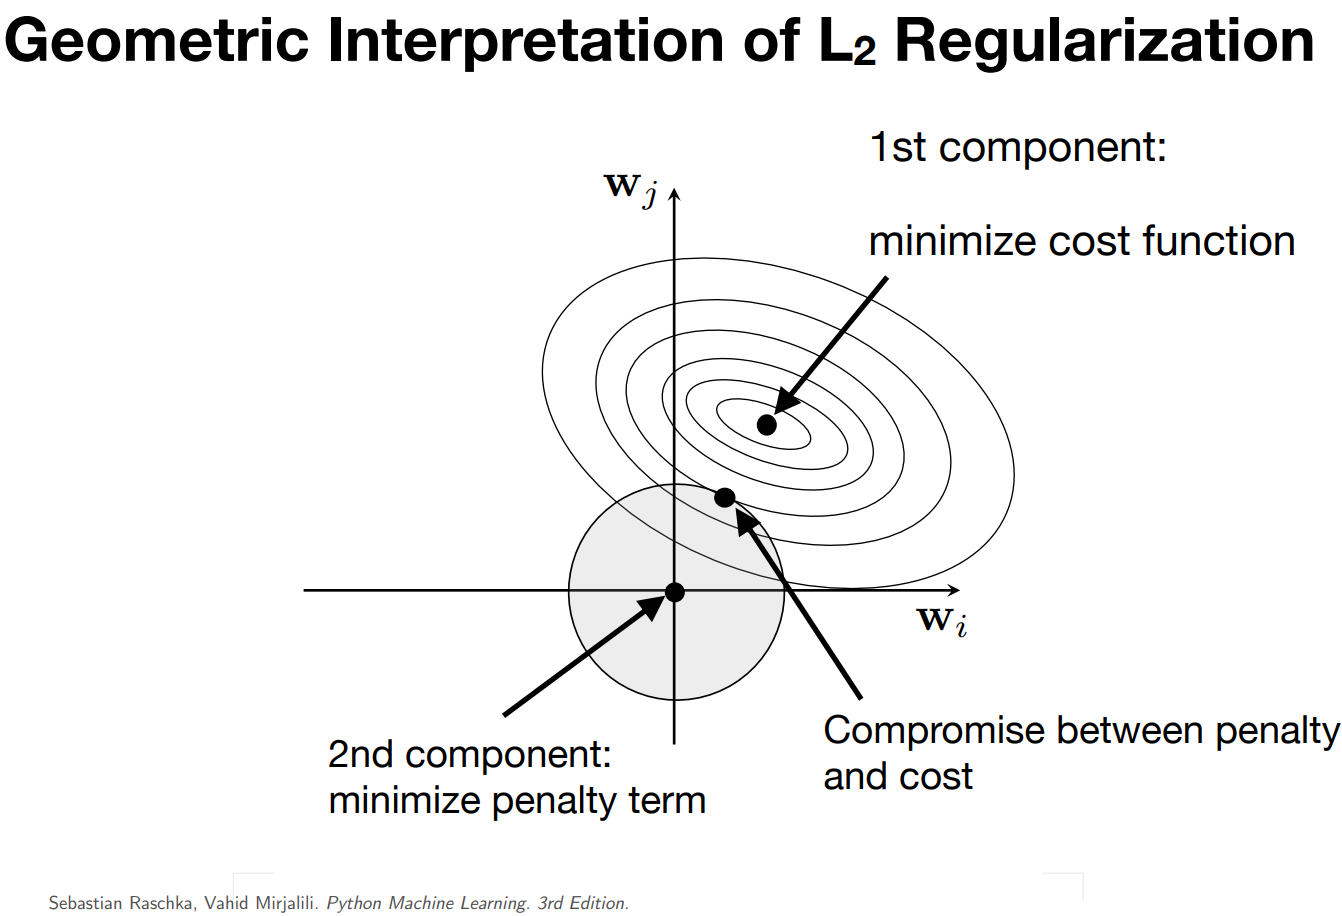 </td>
<td> 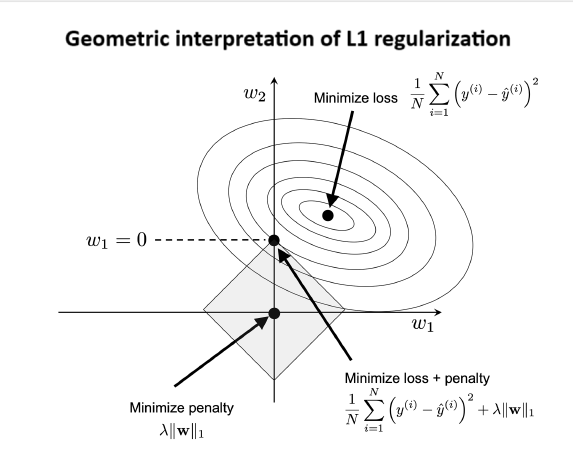 </td>
</tr></table>

The key difference is that lasso can shrink the coefficients to 0, while ridge cannot.


We repeat the steps from the Ridge regression, but this time we use the Lasso model.

In [157]:
from sklearn.linear_model import Lasso

In [158]:
def plot_lasso(X,y, alpha_value):

    poly_features = PolynomialFeatures(degree=20, include_bias=False)
    scaler=StandardScaler()
    lasso = Lasso(alpha=alpha_value, max_iter=10000, tol=1e-2)
    X_poly = poly_features.fit_transform(X)
    X_scaled=scaler.fit_transform(X_poly)
    lasso.fit(X_scaled, y)
    y_pred=lasso.predict(X_scaled)
    error=1/len(y)*((y-y_pred)**2).sum()
    
    fig = plt.figure(figsize=(5,5))
    plt.plot(X,y,'.', label='true values')
    plt.plot(X,y_pred, label='model', color='green')
    plt.xlabel("$x$", fontsize=14)
    plt.ylabel("$y$", fontsize=14)
    plt.legend(loc="lower left", fontsize=10)
    print('training error is' , error)
    print('intercept estimate is ', lasso.intercept_)
    display('estimate of the coefficients:', (lasso.coef_) )
    return lasso.coef_

Let's now run the code with, putting the importance of the penalty function very low,  meaning we set the penalty importance parameter $\alpha$ to a low value.

training error is 0.09987081258387315
intercept estimate is  0.017343773951478347


C:\ProgramData\anaconda3\envs\ml2025\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.996e+00, tolerance: 3.798e-01
  model = cd_fast.enet_coordinate_descent(


'estimate of the coefficients:'

array([ 2.15507229e+00, -4.12628312e+00, -1.21655053e+00,  8.11333834e-01,
        1.38899628e+00,  1.08720130e+00,  5.09384628e-01, -1.97901882e-03,
       -3.24439296e-01, -4.57051409e-01, -4.47531025e-01, -3.52509267e-01,
       -2.20274117e-01, -8.57519633e-02,  2.89103692e-02,  1.11759683e-01,
        1.58154039e-01,  1.68262764e-01,  1.45160336e-01,  9.34560605e-02])

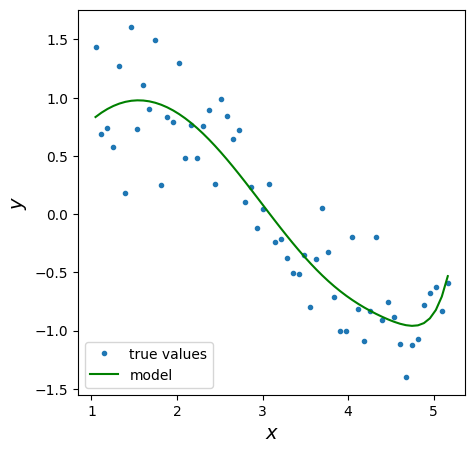

In [160]:
alpha_s = 1e-10
lasso_small = plot_lasso(X,y, alpha_s)

Now putting more importance on the penalty function.

training error is 0.10512762773865002
intercept estimate is  0.017343773951479468


'estimate of the coefficients:'

array([ 0.14050825, -0.93915014, -0.37152743, -0.        ,  0.        ,
        0.02937262,  0.20785698,  0.14484871,  0.0911164 ,  0.05152787,
        0.0250782 ,  0.00888568,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

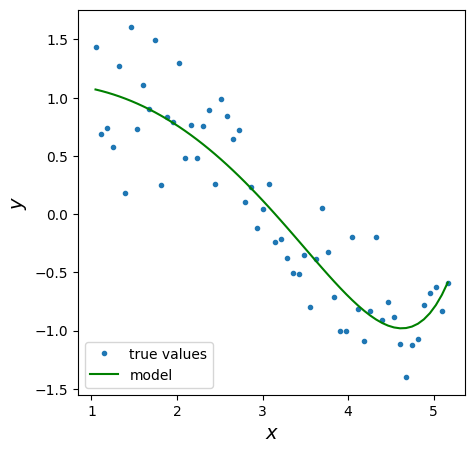

In [162]:
alpha_m = 1e-3
lasso_medium = plot_lasso(X,y, alpha_m)

And now with a high value.

training error is 0.6329951569326172
intercept estimate is  0.01734377395147963


'estimate of the coefficients:'

array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0.])

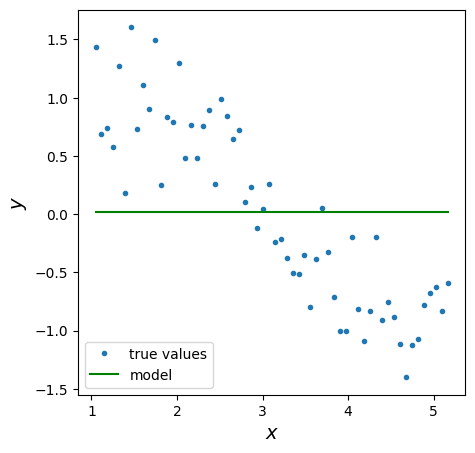

In [164]:
alpha_h = 1
lasso_high = plot_lasso(X,y, alpha_h)

What is happening with the parameters as we keep increasing the value of $\alpha$? Again, let's visualize this.

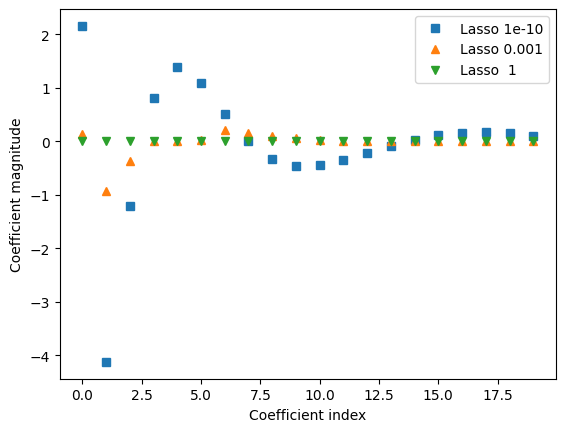

In [166]:
plt.plot(lasso_small, 's', label=f"Lasso {alpha_s}")
plt.plot(lasso_medium, '^', label=f"Lasso {alpha_m}")
plt.plot(lasso_high, 'v', label=f"Lasso  {alpha_h}")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend();

Again we see that for the low values of $\alpha$, our coefficients are higher. Let's zoom in the case of medium and high value of $\alpha$.

Note: terms like `low` and `high` values of the parameter are relative. What is `low` for one dataset or one approach might be high for another. There are rarely universally good values for all the datasets. The parameter $\alpha$ is a hyperparameter and some effort must be invested to find an appropriate level of a hyperparameter for a given dataset. More on this later on.

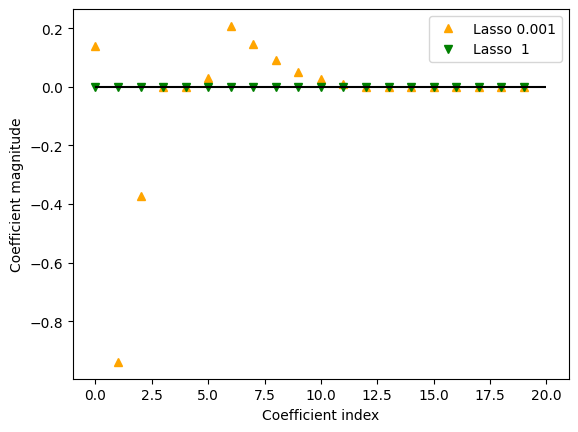

In [169]:
plt.plot(lasso_medium, '^', label=f"Lasso {alpha_m}", color='orange')
plt.plot(lasso_high, 'v', label=f"Lasso  {alpha_h}", color='green')
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(ridge_high), color='black')
plt.legend();

What can we say about the values of the coefficient as $\alpha$ increases? How do these two cases compare?

And how does Lasso compare to Ridge?

In practice, Ridge regression is usually the first choice between these two models. However, if we have a large amount of features and expect only a few of them to be important, Lasso might be a better choice. Similarly, if we would like to have a model that is easy to interpret, Lasso will provide a model that is easier to understand, as it will select only a subset of the input features. `scikit-learn` also provides the ElasticNet class, which combines the penalties of Lasso and Ridge. In practice, this combination works best, though at the price of having two parameters to adjust: one for the L1 regularization, and one for the L2 regularization.

## Regression metrics

Let's generate a small dataset using `make_regression`, with some features being not informative.

In [174]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=10, noise=20,  n_informative=5,  random_state=1) 

We'll divide the dataset with a `train_test_split` function. The parameter test_size defines the proportion of the dataset to use for testing. Here, the test set will receive 40% of the data, and the random state parameter ensures that the results won't change when we re-run the code. 

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.4)

Now, let's apply Ridge Regression.

In [178]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

Let's check the mean squared error and the mean absolute error.

In [180]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = ridge.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
print('Mean Squared Error is', MSE)
print('Mean Absolute Error is', MAE)

Mean Squared Error is 569.4523528220172
Mean Absolute Error is 20.62142565022108


The key difference between MSE and MAE are that the former emphasizes larger errors further through squaring than the latter, but is also more difficult to interpret because of the squared units. MSE is also sensitive to outliers as it penalizes their presence more, whereas MAE doesn't amplify these large errors because it is a simple average of the prediction error.

We can also check the root of the mean squared error which gives us the Root Mean Squared Error. The most significant advantage of RMSE over MSE is its interpretability. RMSE is in the same units as the target variable being predicted, making it easier for practitioners to understand the magnitude of the error in the context of the problem domain. For example, if we are predicting housing prices in dollars, MSE would be in squared dollars, which is hard to interpret. In contrast, RMSE would be directly in dollars, allowing for a more intuitive understanding of the average error per prediction. In addition to being interpretable, RMSE also penalizes large errors more than MAE. 

In [183]:
from sklearn.metrics import root_mean_squared_error
RMSE=root_mean_squared_error(y_test, y_pred )
print('Root Mean Squared Error is', RMSE)

Root Mean Squared Error is 23.863200808399892


We can find the  $R^2$:

In [185]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('R2 is', r2)

R2 is 0.9535198263758744


Note that we the `score` method of the Ridge regression is  $R^2$. Hence, the same value we could obtain directly with:

In [187]:
ridge.score(X_test, y_test)

0.9535198263758744

We will be using score function often, as it is available in many estimators, but before applying it is crucial to know what metric is being calculated (check the documentation). The specific metric returned depends on the type of estimator being used.

Since  $R^2$ increases every time we add a feature to a model, it might show misleadingly high values for overfitted models. Hence Adjusted  $R^2$ is used instead. It can be calculated using the values of  $R^2$, but considering the sample size and the number of features 

$Adjusted$ $R^2$ = $1-\frac{(1-R^2)(n-1)}{(n-p-1)}$ </br>

where n is the number of data points in the data set used to evaluate the metric and p is the number of features.

In [190]:
adj_r2 = 1 - ((1 - r2) * (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
print('Adjusted R2 is', adj_r2)

Adjusted R2 is 0.9374921802985897


$Adjusted$ $R^2$ is lower than $R^2$, but still very high.

## Practice question

For the data below (X,y), plotted in blue, fit the polynomial regression model. 
Test different polynomial degrees. Try Ridge and Lasso with different $\alpha$ values.
How well does it predict the values of $y_{test}$ for input $X_{test}$ (red points)? How is this reflected in the regression metrics?

In [193]:
X.shape

(100, 10)

In [194]:
np.random.rand(m, 1).shape

(50, 1)

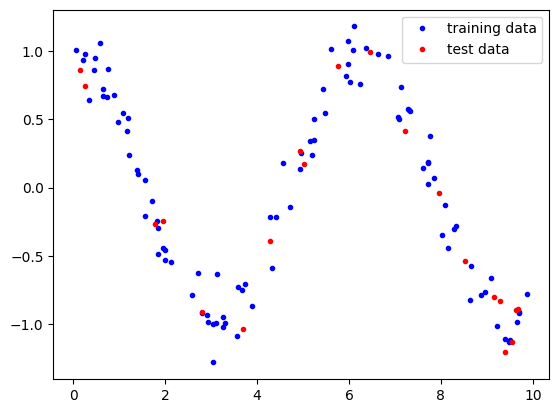

In [195]:
np.random.seed(42)
m = 100
X = 10 * np.random.rand(m)
X.sort(axis=0)
y = np.cos(X) + 0.3 * np.random.normal(0,0.5,m)
plt.plot(X, y,'b.', label='training data')

n_val=20
X_test = 10 * np.random.rand(n_val)
X_test.sort(axis=0)
y_test = np.cos(X_test) + 0.3 * np.random.normal(0,0.5,n_val)
plt.plot(X_test, y_test,'r.', label='test data')
plt.legend();

# Data visualization (optional)

The following is a summary of Chapter 4 of *Python Data Science Handbook* by Jake VanderPlas.

https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html

## Matplotlib

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats. Saving a figure can be done using the *savefig()* command. For example, to save a simple figure as a PNG file, we can run this:

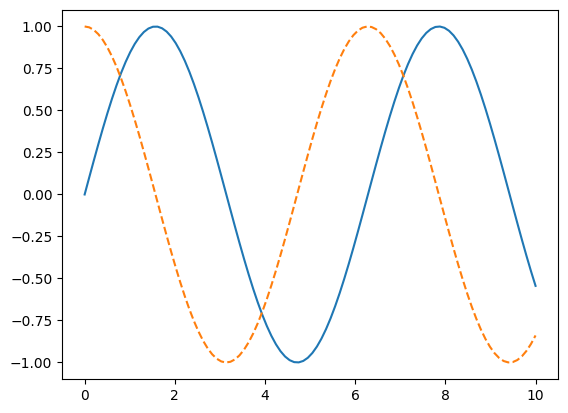

In [199]:
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')
fig.savefig('my_figure.png')

We now have a file called *my_figure.png* in the current working directory.

Let's use the IPython *Image* object to display the contents of this file:

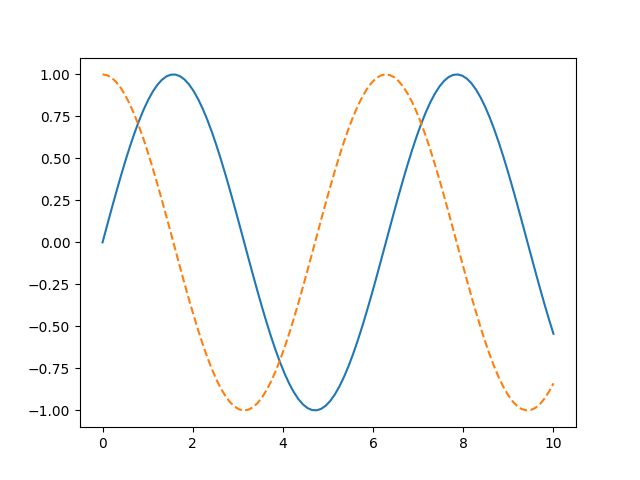

In [202]:
from IPython.display import Image
Image('my_figure.png')

The following formats are supported for *fig.save_fig()* :

In [204]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

A potentially confusing feature of Matplotlib is its dual interfaces: *pyplot (plt)* interface and object-oriented interface. For more simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated. First, let's see an example with the *plt* interface.

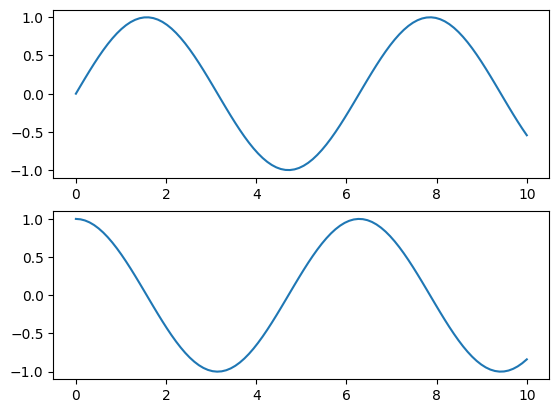

In [206]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

And here is the same plot, but using the object-oriented approach:

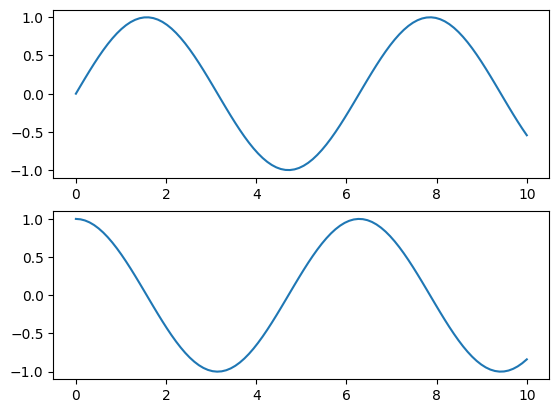

In [208]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

### MatplotLib Basics

For all Matplotlib plots, we start by creating a figure and axes. In their simplest form, a figure and axes can be created as follows:

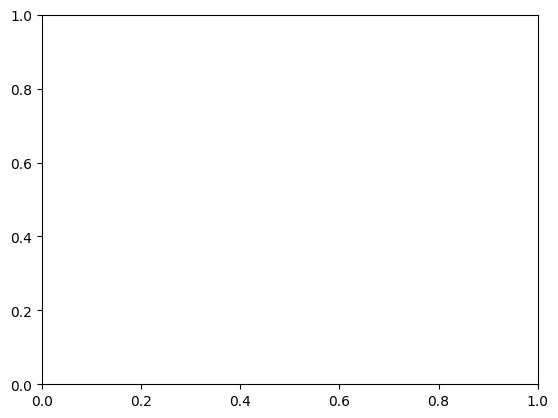

In [210]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the figure (an instance of the class *plt.Figure*) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. The axes (an instance of the class *plt.Axes*) is: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization:
<div>
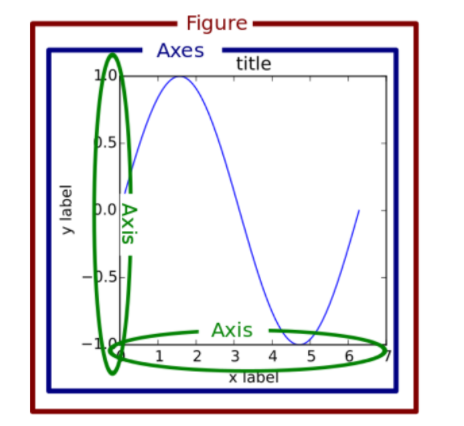
</div>



The first adjustment we might wish to make to a plot is to control the line colors and styles. The *plt.plot()* function takes additional arguments that can be used to specify these. To adjust the color, we can use the *color* keyword, which accepts a string argument representing virtually any imaginable color. The color can be specified in a variety of ways:

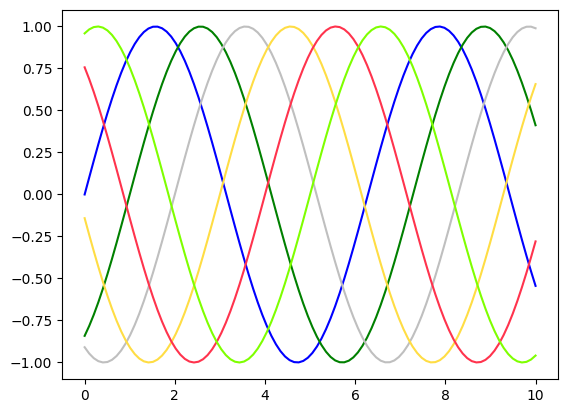

In [213]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

Similarly, the line style can be adjusted using the *linestyle* keyword:

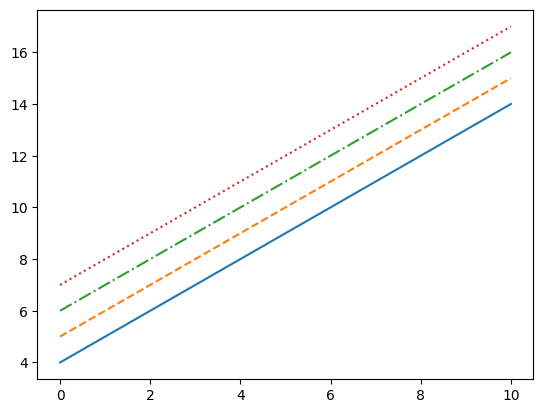

In [215]:
# For short, we can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

Axis limits for plotting can be set with *plt.xlim* and *plt.ylim* or jointly with *plt.axis* which allows us to set the x and y limits with a single call, by passing a list which specifies [xmin, xmax, ymin, ymax]:

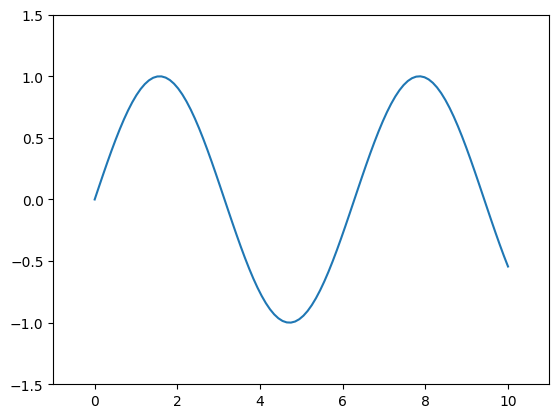

In [217]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

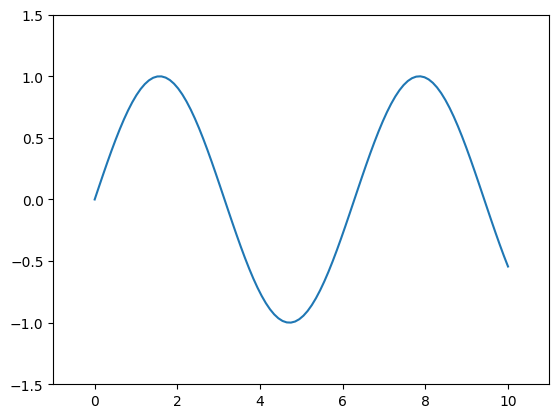

In [218]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

Labeling the axes is done with *plt.xlabel*, *plt.ylabel* and setting the title with *plt.title*.

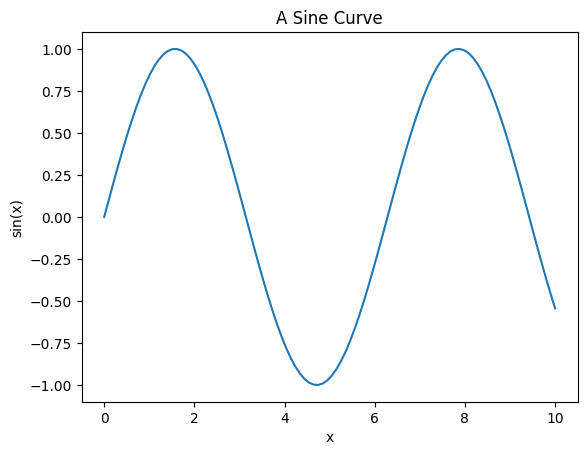

In [220]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

While most *plt* functions translate directly to *ax* methods (such as *plt.plot() → ax.plot()*, *plt.legend() → ax.legend()*, etc.), this is not the case for all the commands. In particular, functions to set limits, labels, and titles are slightly modified. For transitioning between plt-style functions and object-oriented methods, make the following changes:

- plt.xlabel() → ax.set_xlabel()
- plt.ylabel() → ax.set_ylabel()
- plt.xlim() → ax.set_xlim()
- plt.ylim() → ax.set_ylim()
- plt.title() → ax.set_title()

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the *ax.set()* method to set all these properties at once:

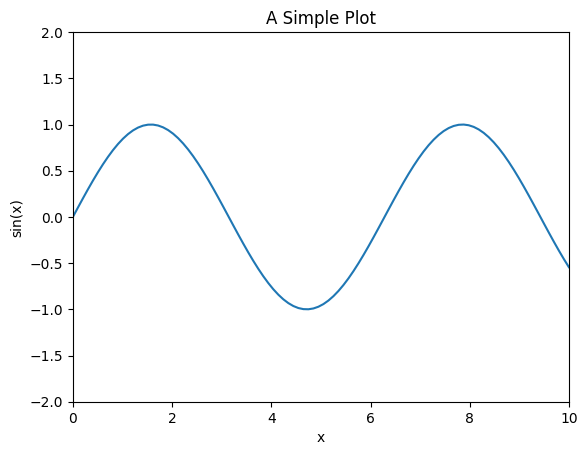

In [222]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

### Scatter plots

In the previous examples, we used *plt.plot* and *ax.plot* to produce line plots. It turns out that this same function can produce scatter plots as well.

Recall that we can use *numpy.linspace* to return return evenly spaced numbers over a specified interval as follows:

`numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)`


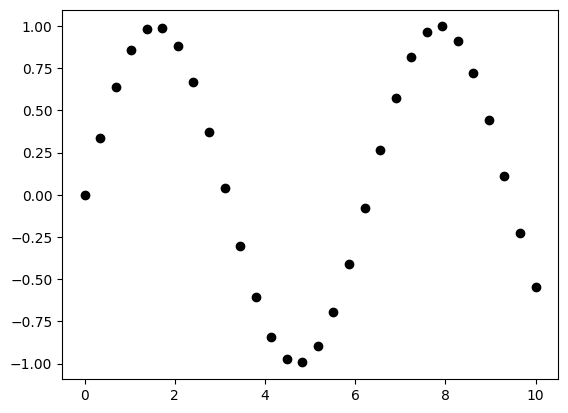

In [225]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

In the *plot* function call, the third argument is a character that represents the type of symbol used for the plotting. Here is an example of using different markers:

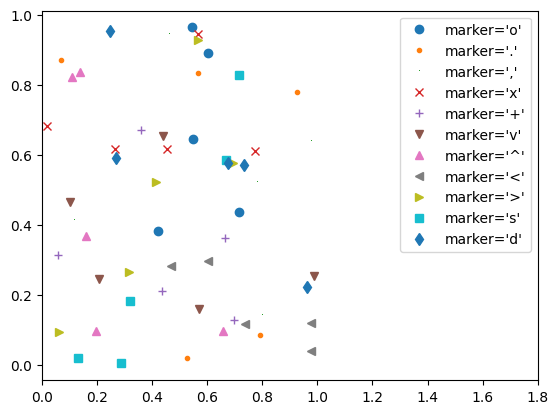

In [227]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend()
plt.xlim(0, 1.8);

A second, more powerful method of creating scatter plots is the *plt.scatter* function, which we have been using in the previous notebooks:

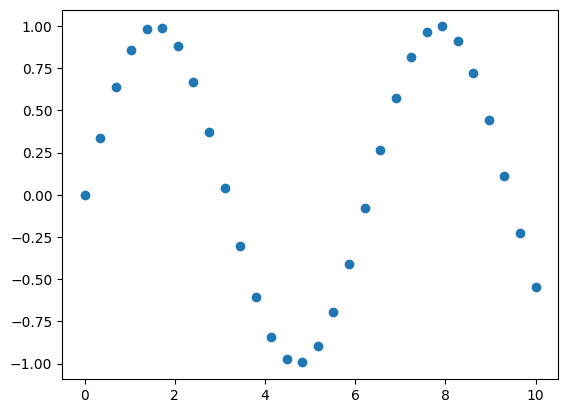

In [229]:
plt.scatter(x, y, marker='o');

The primary difference of *plt.scatter* from *plt.plot* is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

In order to better see the overlapping results, we can also use the *alpha* keyword to adjust the transparency level.

For example, we might use the Iris data from `sklearn`, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured.
 
 Notice that the color argument is automatically mapped to a color scale (shown here by the *colorbar()* command), and that the size argument depends on the feature 4 (petal width). We can use *iris.feature_names* to obtain a list of features of the `sklearn` dataset.



['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

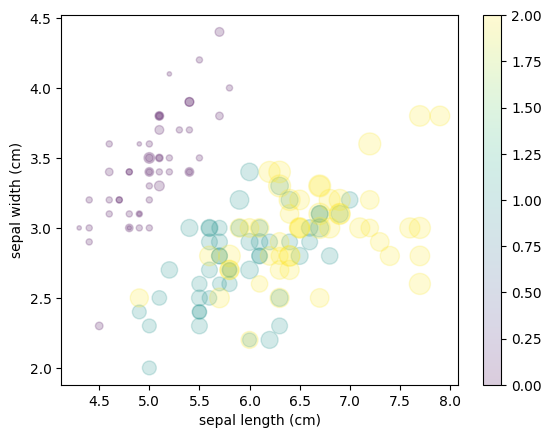

In [231]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,    s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);
plt.colorbar();  # show color scale
iris.feature_names

We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data: 
- the (x, y) location of each point corresponds to the sepal length and width
- the size of the point is related to the petal width
- the color is related to the particular species of flower (target). 

Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

### Histograms

A simple histogram can be a great first step in understanding a dataset. 

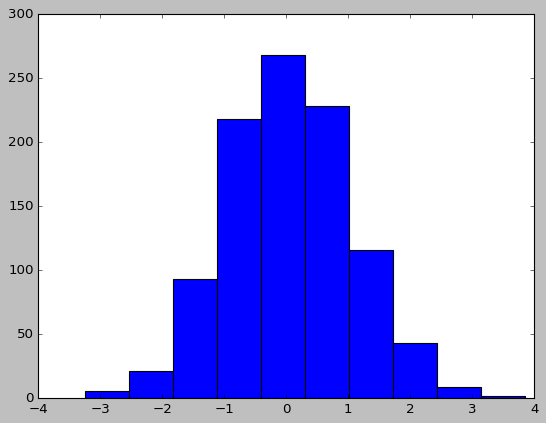

In [235]:
plt.style.use("classic")
data = np.random.randn(1000)
plt.hist(data);

The *hist()* function has many options to tune both the calculation and the display; here's an example of a more customized histogram:

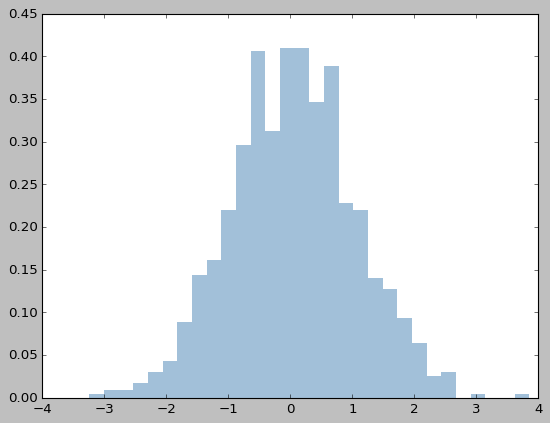

In [237]:
plt.hist(data, bins=30,  alpha=0.5, density=True,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

If we would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the *np.histogram()* function is available. 

In [239]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 26 311 496 158   9]


### Stylesheets

The available styles are listed in *plt.style.available*. Let's see the names of the first few:

In [242]:
plt.style.available[:10]

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot']

The basic way to switch to a stylesheet is to call *plt.style.use('stylename')* but keep in mind that this will change the style for the rest of the session.

Alternatively, we can use the style context manager, which sets a style temporarily:

In [245]:
#with plt.style.context('stylename'):
#    make_a_plot()

Let's make some function that draws two plots and test it with different styles.

In [247]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

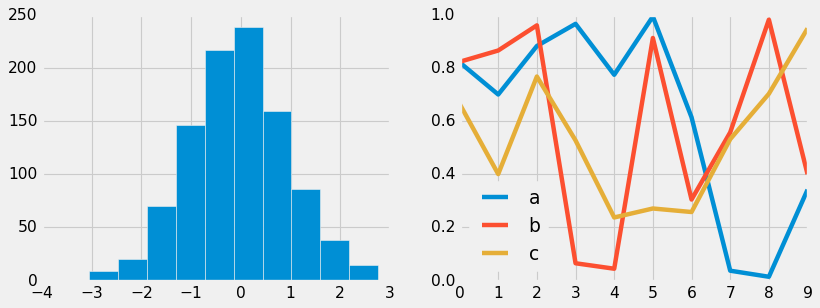

In [248]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

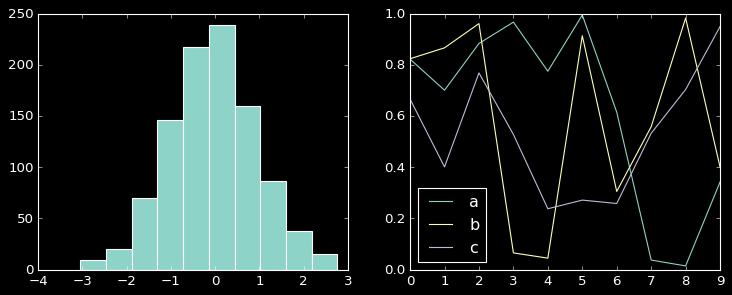

In [249]:
with plt.style.context('dark_background'):
    hist_and_lines()

## Seaborn

Seaborn is a Python data visualization library. It provides an API on top of Matplotlib that offers choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas DataFrames.

Let's plot a simple graph first using *matplotlib* and then *seaborn*.

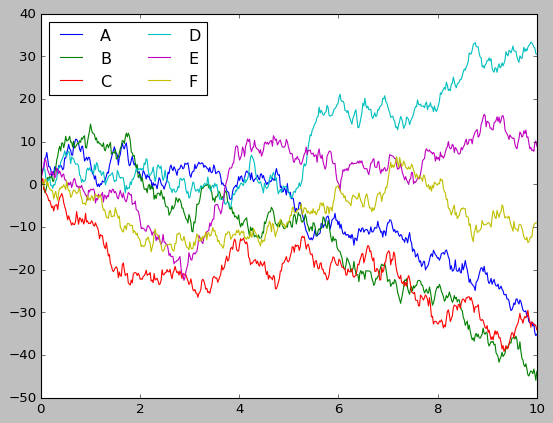

In [253]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

We can set the style by calling Seaborn's *set()* method. By convention, Seaborn is imported as sns:

In [255]:
import seaborn as sns
sns.set()

Now let's rerun the same two lines as before:

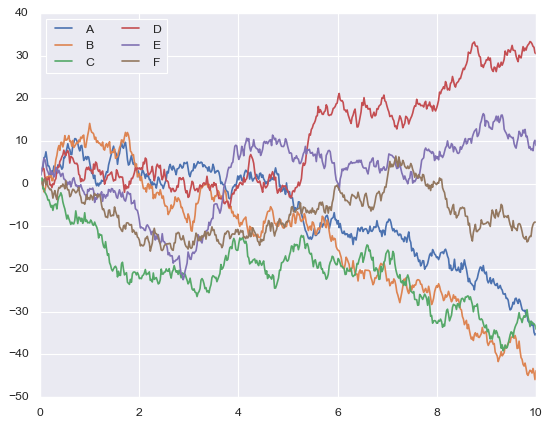

In [257]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following could be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood), but the Seaborn API is much more convenient.

### Histograms, KDE, densities

Let's revisit histograms.

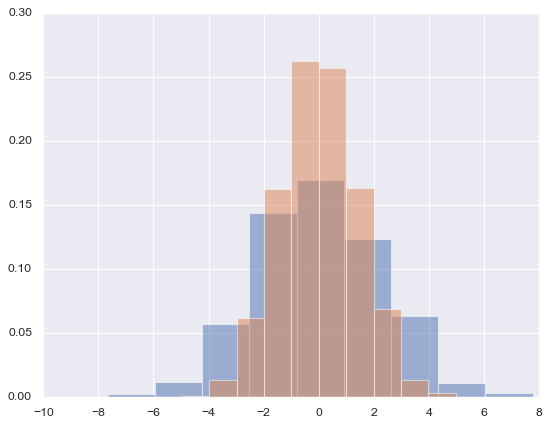

In [260]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with *sns.kdeplot*:

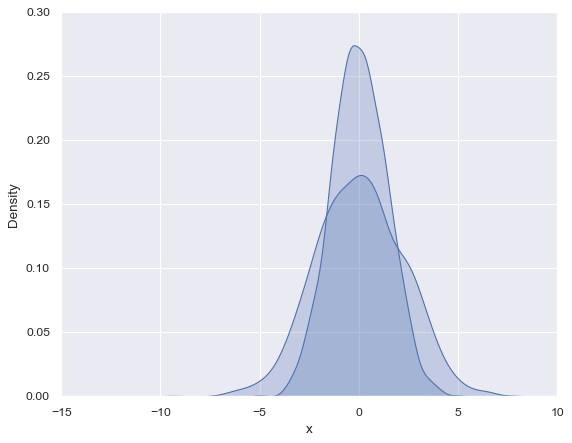

In [262]:
for col in 'xy':
    sns.kdeplot(data[col], fill=True)

We can also use the function *sns.displot* to plot both the histogram and the density.

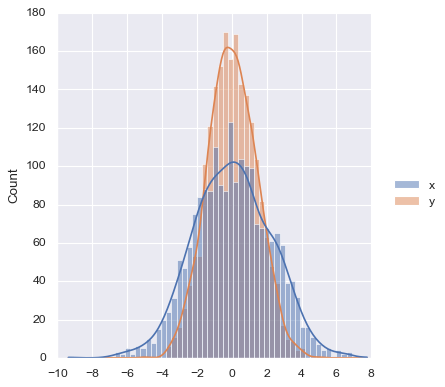

In [264]:
sns.displot(data, kde=True)

### Pair plots
When we generalize joint plots to datasets of larger dimensions, we end up with pair plots. This is very useful for exploring correlations between multidimensional data, when we would like to plot all pairs of numeric features against each other.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species, just like we did in the first notebook.

In [266]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Visualizing the multidimensional relationships among the samples is as easy as calling *sns.pairplot*, as we saw in Notebook 1:

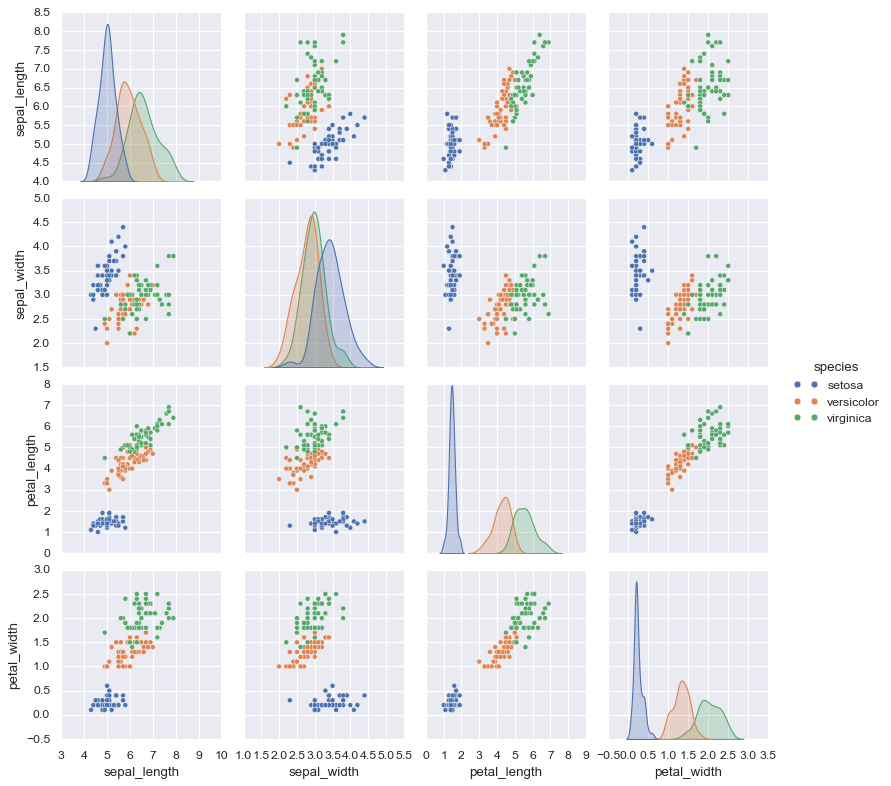

In [268]:
sns.pairplot(iris, hue='species', height=2.5)

### Faceted histograms
Sometimes the best way to view data is via histograms of subsets. Seaborn's *FacetGrid* makes this extremely simple. We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [270]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [271]:
tips.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

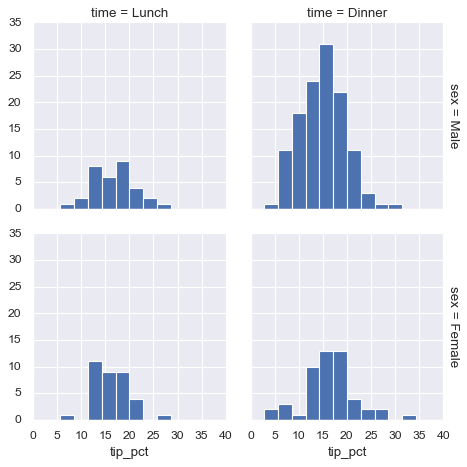

In [272]:
tips['tip_pct'] = tips['tip'] / tips['total_bill'] * 100

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Cat plots
Cat plots can be useful for this kind of visualization as well. This allows us to view the distribution of a parameter within bins defined by any other parameter:

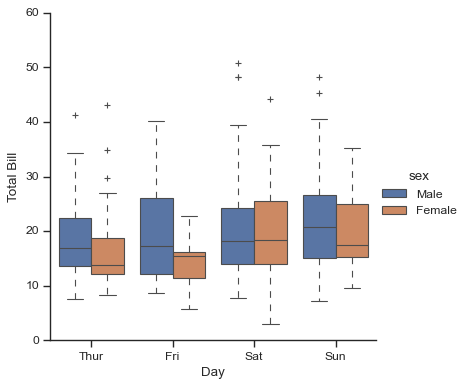

In [274]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint distributions
We can use `sns.jointplot` to show the joint distribution between different datasets, along with the associated marginal distributions:

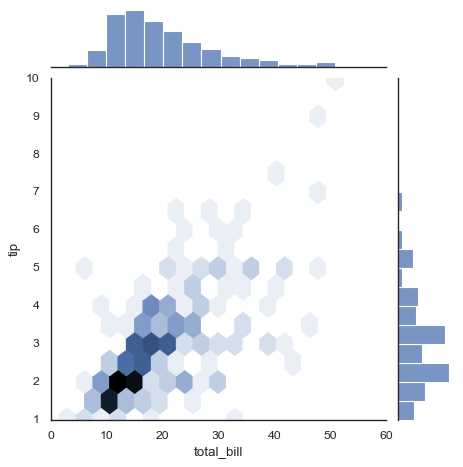

In [276]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression:

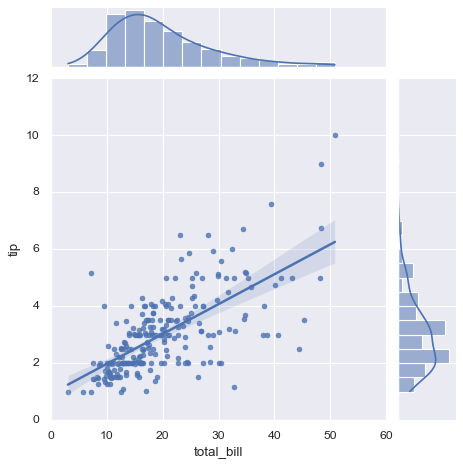

In [278]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg')

### Violin plots
A violin plot is a hybrid of a box plot and a kernel density plot, and it shows  the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual data points, the violin plot features a kernel density estimation of the underlying distribution.

Here is an illustration of a violin plot:

<div>
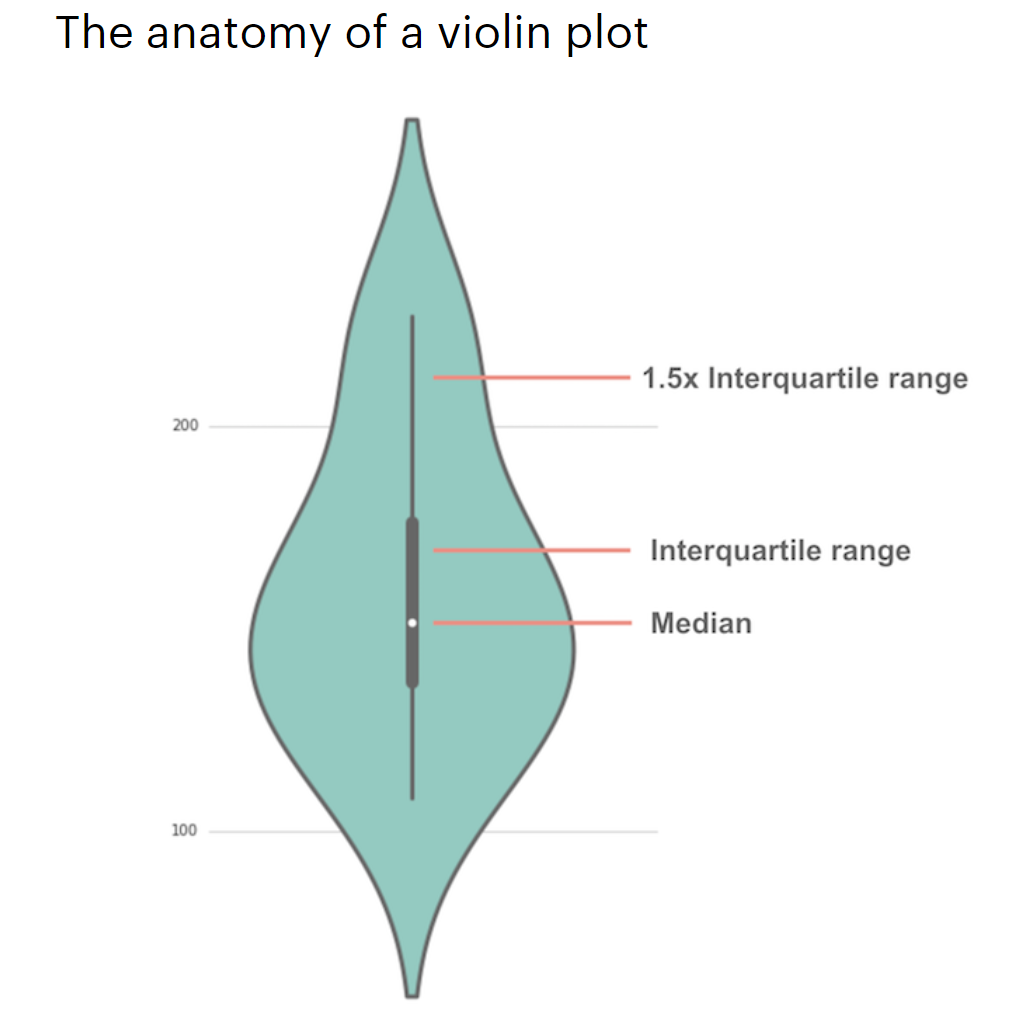
</div>



Violin plots have many of the same summary statistics as box plots:

- the white dot represents the median
- the thick gray bar in the center represents the interquartile range
- the thin gray line represents the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the interquartile range.

On each side of the gray line is a kernel density estimation to show the distribution shape of the data. Wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability.

Here is how we can draw a basic violin plot:

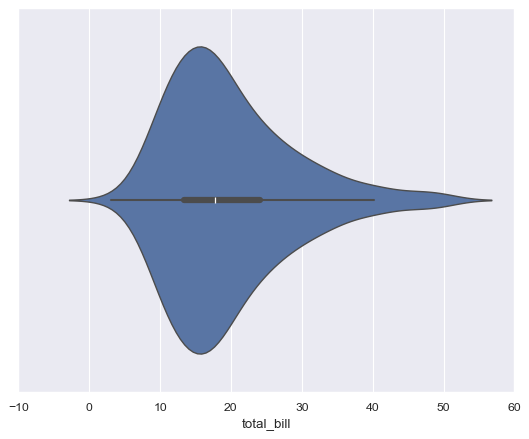

In [282]:
ax = sns.violinplot(x=tips["total_bill"])

Next we can compare the distribution of the variable *total_bill* for different values of categorical variables: through x-axis (*x='day'*) and through hue (*hue='smoker'*)

<Axes: xlabel='day', ylabel='total_bill'>

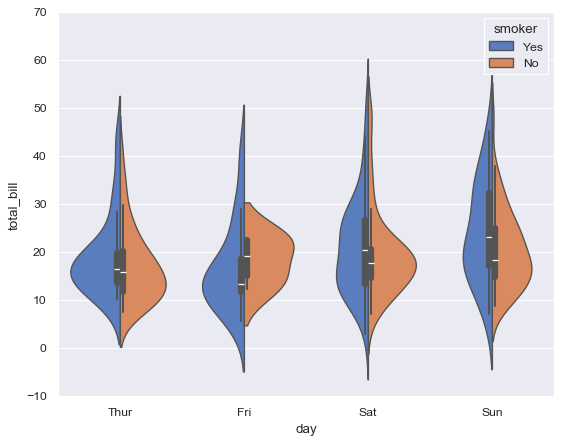

In [284]:
sns.violinplot(x="day", y="total_bill", hue="smoker",data=tips, palette="muted", split=True)